## KNN (k - nearest neigbors classifier)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "batang")
plt.rc("axes",unicode_minus = False)

In [2]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [3]:
import numpy as np
#도미도미 방어방어
#string interpolation
print("도미 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length))) #스트링인더포메이션
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))



도미 무게 = 617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


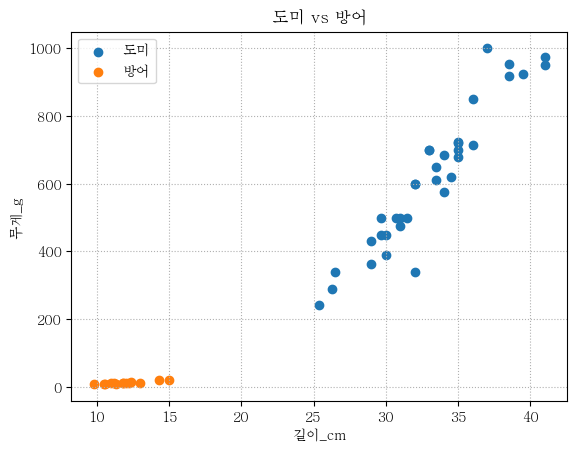

In [4]:
## scatter plot: 산점도
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.legend()
plt.xlabel("길이_cm")
plt.ylabel("무게_g")
plt.grid(linestyle = ":")
plt.show()

In [5]:
## list
length = bream_length + smelt_length  ## 리스트가 확장됨
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weight))

## x_2d
fish_data = np.column_stack([length, weight])
print(np.shape(fish_data)) # (행,열) : (49,2)

(49,)
(49,)
(49, 2)


In [6]:
##
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target
# 뒤집어도 모델에 상관없으나 보통 1을 타겟으로 둠

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
## knn class 만들기
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression


In [8]:
knn = KNeighborsClassifier(n_neighbors= 5,        #파라미터 공부하기
                           weights = "uniform",
                           metric = "minkowski",
                           p = 2)

knn.fit(fish_data, fish_target)
print("Train ACC = ",knn.score(fish_data, fish_target)) #1.0 : 100%

Train ACC =  1.0


In [9]:
## Attribute 
## 메뉴얼에서 확인할 수 있어요

print("classes =", knn.classes_)
print("metrics =", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes = [0. 1.]
metrics = euclidean
samples =  49


In [10]:
##
np.column_stack([fish_data,fish_target])

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [11]:
idx = np.arange(49)
np.random.shuffle(idx)

print(idx)

[ 4  8 14 10 11  6 46  3 21 42 27 13 30 44 23 25 35 20 41 16 38 34 31  2
 40 12 48  0 29  7 39 43 22  5 18 36 15 19 33 28 32 37 24  1 47 26  9 17
 45]


In [12]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

#print(np.column_stack((train_X, train_y)))
print(np.column_stack((test_X, test_y)))

#원래는 추가샘플 필요해요

[[ 10.5   7.5   0. ]
 [ 32.  600.    1. ]
 [ 33.5 650.    1. ]
 [ 41.  975.    1. ]
 [ 36.  850.    1. ]
 [ 39.5 925.    1. ]
 [ 10.6   7.    0. ]
 [ 35.  700.    1. ]
 [ 26.3 290.    1. ]
 [ 14.3  19.7   0. ]
 [ 35.  720.    1. ]
 [ 30.7 500.    1. ]
 [ 33.  700.    1. ]
 [ 12.4  13.4   0. ]]


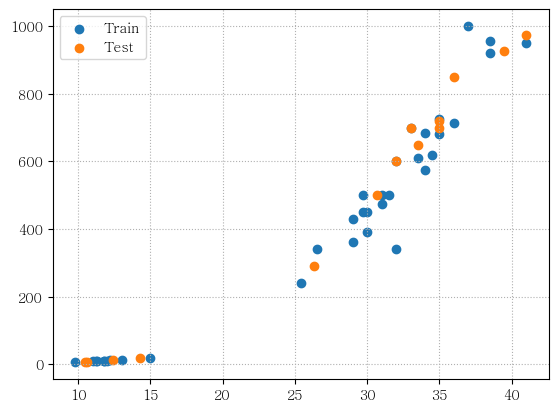

In [13]:
plt.scatter(train_X[:,0], train_X[:,1], label = "Train")
plt.scatter(test_X[:,0], test_X[:,1], label = "Test")

plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [14]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights= "uniform",
    metric = "minkowski",
    p = 2)

In [15]:
knn.fit(train_X, train_y)
print("Test Acc = ", knn.score(test_X, test_y))

print("classes =",knn.classes_)
print("metrics =",knn.effective_metric_)
print("smaples =",knn.n_samples_fit_)

Test Acc =  1.0
classes = [0. 1.]
metrics = euclidean
smaples = 35


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify= fish_target, random_state= 911
)
# random_state : 항상 동일한 결과를 얻을 수 있음
print(train_X)

[[  35.   720. ]
 [  30.   390. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  31.   500. ]
 [  29.   363. ]
 [  11.3    8.7]
 [  25.4  242. ]
 [  11.2    9.8]
 [  41.   975. ]
 [  32.   340. ]
 [  41.   950. ]
 [  12.2   12.2]
 [  31.   475. ]
 [  26.5  340. ]
 [  34.5  620. ]
 [  15.    19.9]
 [  33.5  650. ]
 [  38.5  955. ]
 [  30.   450. ]
 [  36.   850. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  34.   575. ]
 [  37.  1000. ]
 [  11.     9.7]
 [  29.   430. ]
 [  36.   714. ]
 [  26.3  290. ]
 [  33.   700. ]
 [  35.   700. ]
 [  29.7  450. ]
 [  33.   700. ]
 [  11.8   10. ]
 [   9.8    6.7]
 [  38.5  920. ]]


In [18]:
knn = KNeighborsClassifier()

knn.fit(train_X, train_y)
knn.score(test_X,test_y)

1.0

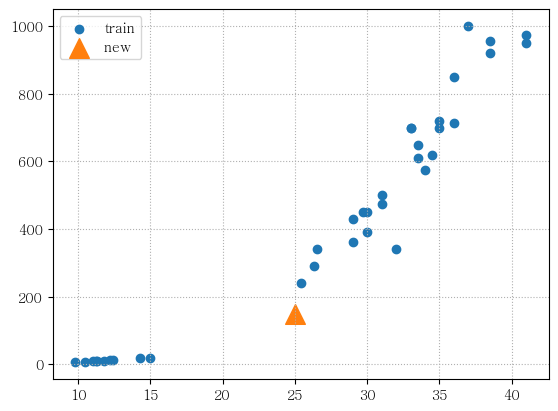

In [19]:
##
plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25,150, marker = "^", s = 200, label = "new ")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [20]:
knn.predict([[25, 150]])

array([0.])

In [21]:
knn.kneighbors([[25, 150]])

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.39320793]]),
 array([[ 7, 16, 22, 21, 12]]))

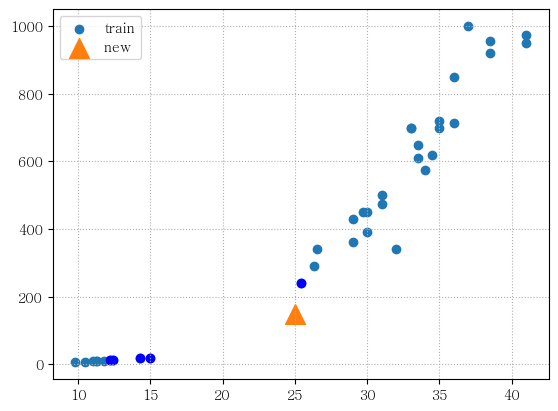

In [22]:
distance, index = knn.kneighbors([[25,150]])

plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25,150, marker = "^", s = 200, label = "new ")
plt.scatter(train_X[index,0],train_X[index,1],color = "b")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

#오류 : 표준화가 안되어있어, 길이의 값을 무시함 

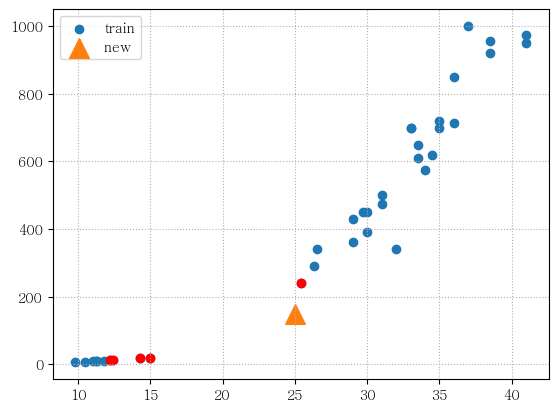

In [23]:

distance, index = knn.kneighbors([[25,150]])

plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25,150, marker = "^", s = 200, label = "new ")
plt.scatter(train_X[index,0],train_X[index,1],color = "r")

plt.legend()
plt.grid(linestyle = ":")
plt.show()



In [24]:
## 표준화

mean = np.mean(train_X, axis= 0)   #[길이, 무게]
std = np.std(train_X, axis= 0)

train_scaled = (train_X - np.mean(train_X, axis= 0))/np.std(train_X, axis=0)
train_scaled


array([[ 0.77132876,  0.83155552],
       [ 0.27741493, -0.16697679],
       [-1.64884898, -1.32436651],
       [ 0.62315461,  0.49871141],
       [ 0.3761977 ,  0.16586731],
       [ 0.17863217, -0.24867489],
       [-1.56982277, -1.32073549],
       [-0.17698579, -0.6148034 ],
       [-1.57970105, -1.31740705],
       [ 1.36402534,  1.60314867],
       [ 0.47498046, -0.31826957],
       [ 1.36402534,  1.52750228],
       [-1.48091828, -1.31014499],
       [ 0.3761977 ,  0.09022092],
       [-0.06832475, -0.31826957],
       [ 0.72193737,  0.52896997],
       [-1.20432654, -1.28684591],
       [ 0.62315461,  0.61974563],
       [ 1.11706843,  1.54263156],
       [ 0.27741493,  0.01457454],
       [ 0.87011152,  1.22491673],
       [-1.46116173, -1.30651397],
       [-1.27347448, -1.28745108],
       [ 0.67254599,  0.39280647],
       [ 0.96889428,  1.67879505],
       [-1.5994576 , -1.31770963],
       [ 0.17863217, -0.04594257],
       [ 0.87011152,  0.81340039],
       [-0.0880813 ,

[-0.21649889 -0.89318211]


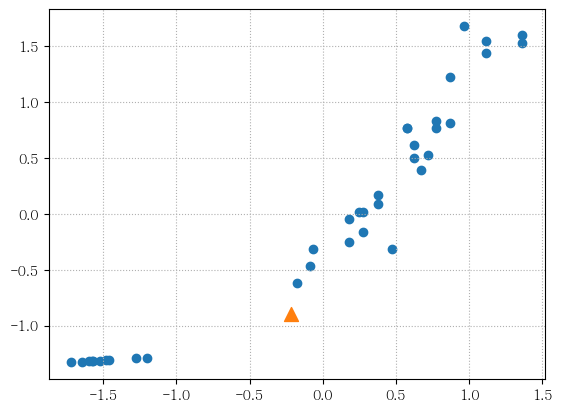

In [25]:
## data형성
new = ([25,150] - mean)/std
print(new)

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = "^", s = 100)

plt.grid(linestyle = ":")
plt.show()


In [26]:
test_scaled = (test_X - mean) /std
knn.fit(train_scaled, train_y)
print("Test ACC =",knn.score(test_scaled, test_y))
print("Prediction = ",knn.predict([new]))

Test ACC = 1.0
Prediction =  [1.]


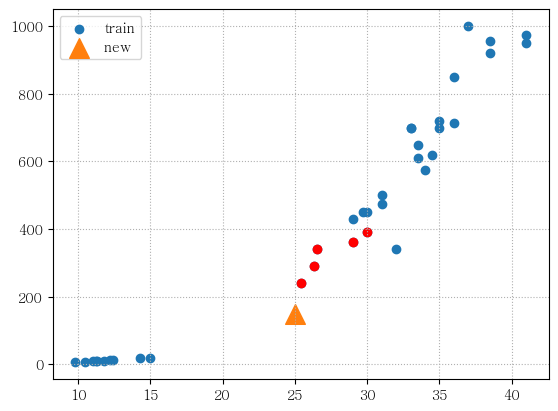

In [27]:
distance, index = knn.kneighbors([new])

plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25,150, marker = "^", s = 200, label = "new ")
plt.scatter(train_X[index,0],train_X[index,1],color = "r")

plt.legend()
plt.grid(linestyle = ":")
plt.show()


In [28]:
##GridSearch

knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3,30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled,train_y)
        score = knn.score(test_scaled,  test_y)
        score_list.append(score)
        n_list.append(n)


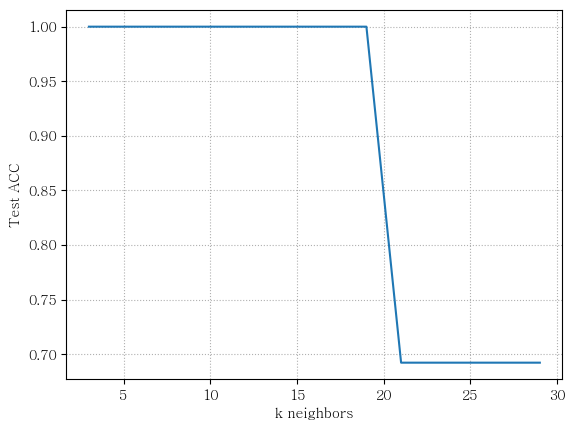

In [29]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()                    # n이 20미만인 경우

## KNN을 이용하여 Seaborn iris 자료분류

In [30]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
knn = KNeighborsClassifier()

In [32]:
## list 
sepal_leng = iris.loc[:,"sepal_length"]
patal_leng = iris.loc[:,"petal_length"]

sepal_width= iris.loc[:,"sepal_width"]
patal_width = iris.loc[:,"petal_width"]

iris_length =pd.concat([sepal_leng, patal_leng], axis=0).reset_index(drop=True)
iris_width = pd.concat([sepal_width, patal_width], axis=0).reset_index(drop=True)

print(np.shape(iris_length))
print(np.shape(iris_width))

# x_2d
iris_data = np.column_stack([iris_length, iris_width])
print(np.shape(iris_data)) # (행,열) : (49,2)
iris_data


(300,)
(300,)
(300, 2)


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [33]:
iris_target = np.append(np.ones(len(sepal_leng)), np.zeros(len(patal_leng)))
iris_target.shape
iris_data.shape

(300, 2)

In [34]:
knn = KNeighborsClassifier()
knn.fit(iris_data, iris_target)
print("Train ACC =", knn.score(iris_data, iris_target))

Train ACC = 0.97


In [35]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


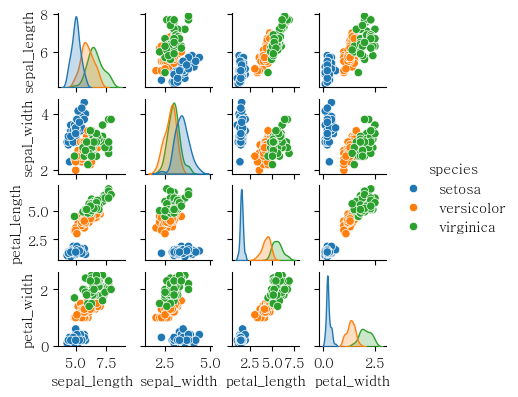

In [36]:
sns.pairplot(iris, hue = "species", height = 1)
plt.show()

## 선생님 ver. KNN을 이용한 iris

In [37]:
X = iris.loc[:,:"petal_width"]
y = iris["species"]

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, stratify=y)

print("Train_X shape = ",train_X.shape)
print("Test_X shape = ",test_X.shape)

Train_X shape =  (120, 4)
Test_X shape =  (30, 4)


In [38]:
## Scaling

mean = train_X.mean()
std = train_X.std()

train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std

print(train_scaled)


     sepal_length  sepal_width  petal_length  petal_width
58       0.915264    -0.303107      0.485119     0.153568
1       -1.096739    -0.075777     -1.323479    -1.315344
125      1.625383     0.378884      1.276380     0.821255
30      -1.215092     0.151554     -1.210441    -1.315344
72       0.560205    -1.212430      0.654675     0.420643
..            ...          ...           ...          ...
138      0.205145    -0.075777      0.598156     0.821255
68       0.441852    -1.894422      0.428600     0.420643
113     -0.149914    -1.212430      0.711193     1.088330
29      -1.333446     0.378884     -1.210441    -1.315344
15      -0.149914     3.106852     -1.266960    -1.048269

[120 rows x 4 columns]


In [39]:
##
knn = KNeighborsClassifier(n_neighbors= 8)

knn.fit(train_scaled, train_y)
print("Train ACC = ", knn.score(train_scaled, train_y))
print("Test ACC = ", knn.score(test_scaled, test_y))

Train ACC =  0.9666666666666667
Test ACC =  1.0


In [40]:
print("classes = ", knn.classes_)
print("feature names = ",knn.feature_names_in_)
print("metric = ",knn.effective_metric_)
print("samples = ",knn.effective_metric_)
print("k = ",knn.n_samples_fit_)

classes =  ['setosa' 'versicolor' 'virginica']
feature names =  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
metric =  euclidean
samples =  euclidean
k =  120


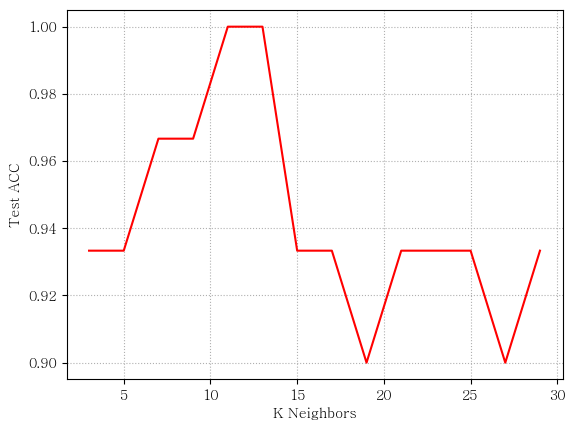

In [41]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3,30):
    if n%2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list, color = "r")
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()

In [50]:
## 
wine = pd.read_csv("http://bit.ly/wine-date")
print(wine.head())
print(wine["class"].value_counts)

wine["class"] = wine["class"].astype("int32")
print(wine["class"].value_counts)

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: class, Length: 6497, dtype: int32>


In [51]:
## summary statistic

wine_group = wine.groupby('class', observed=True)

wine_group.describe()
for idx, data in wine_group:
    print("class =", idx)
    print(data.describe())
    print("="*50)

class = 0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class = 1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


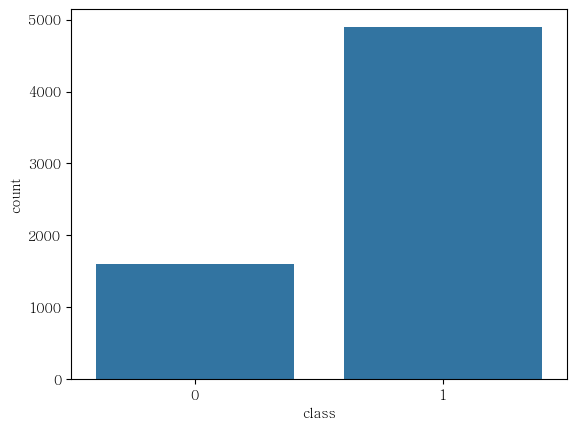

In [54]:
## Visualization
sns.countplot(wine, x = "class")
plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)
dt.score(test_X, test_y)

0.9

In [75]:
wine = pd.read_csv("http://bit.ly/wine-date")
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [76]:
##
wine["class"] = wine['class'].astype("int32")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 177.8 KB


In [77]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [ ]:
X = wine.loc[:"pH"]
y = wine["class"]

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, stratify=y)

s